# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [2]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)


Using TensorFlow 2.1.0


# Task 2: Rotation

In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range=10
)

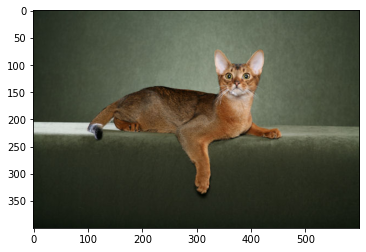

In [6]:
image_path = 'Image/cat/cat.jpg'

plt.imshow(plt.imread(image_path));


Found 1 images belonging to 2 classes.


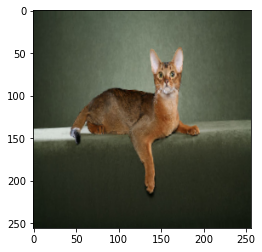

In [10]:
x, y = next(generator.flow_from_directory('Image', batch_size = 1))

plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [34]:

generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = [-100, 50, 0, 50, 100],
                                                           height_shift_range = [-50, 0, 50])

Found 1 images belonging to 2 classes.


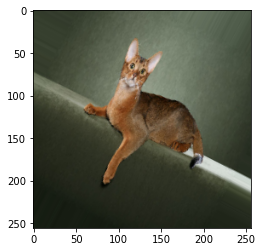

In [79]:
x, y = next(generator.flow_from_directory('Image', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 2 classes.


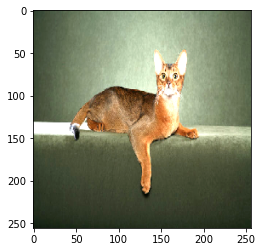

In [73]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range = (0.5, 2.))

x, y = next(generator.flow_from_directory('Image', batch_size = 1))
plt.imshow(x[0].astype('uint8'));


# Task 5: Shear Transformation

Found 1 images belonging to 2 classes.


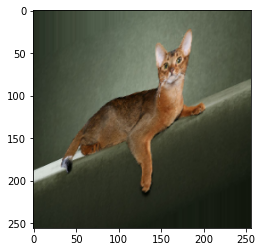

In [80]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range = 40)

x, y = next(generator.flow_from_directory('Image', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 2 classes.


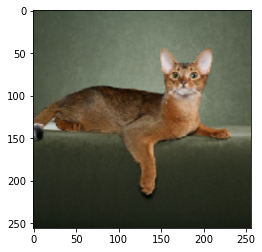

In [81]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range = 0.9)

x, y = next(generator.flow_from_directory('Image', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 2 classes.


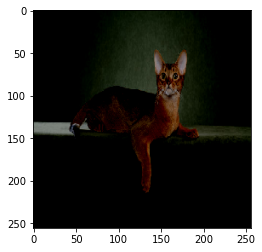

In [89]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(channel_shift_range = 100)

x, y = next(generator.flow_from_directory('Image/', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [85]:
x.mean()

9.509005

In [41]:
np.array(Image.open(image_path)).mean()

69.57810416666666

# Task 8: Flips

Found 1 images belonging to 2 classes.


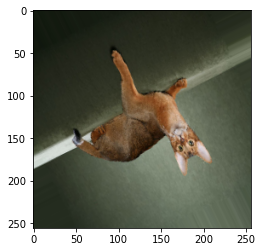

In [91]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True,
                                                           vertical_flip = True,
                                                           rotation_range = 30)

x, y = next(generator.flow_from_directory('Image/', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization


In [46]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center = True,
                                                           featurewise_std_normalization = True)

generator.fit(x_train)

In [47]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.837684 1.1612474 [[7]]
120.70756512369792


### Samplewise

In [48]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(samplewise_center = True,
                                                           samplewise_std_normalization = True)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-5.9604645e-08 1.0 [[9]]


# Task 10: Rescale and Preprocessing Function

In [ ]:

generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.,
                                                           preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input)

In [ ]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [49]:
print(x.mean(), x.std(), y)

-5.9604645e-08 1.0 [[9]]


# Task 11: Using in Model Training

In [52]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
                                                           horizontal_flip = True,
                                                           rotation_range  = 20)# Your code here

In [53]:
model = tf.keras.models.Sequential([tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,
                                                                                   input_shape = (224, 224, 3),
                                                                                   pooling = 'avg'),
                                   tf.keras.layers.Dense(10,
                                                         activation = 'softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])# Your code here

9412608/9406464 [==============================] - 11s 1us/step


In [92]:

_ = model.fit(generator.flow(x_train,
                             y_train,
                             batch_size = 32),
             epochs = 1,
             steps_per_epoch = 10)

  ...
    to  
  ['...']
Train for 10 steps
10/10 [==============================] - 11s 1s/step - loss: 2.6861 - accuracy: 0.1875
